# Pet-проект - расчёт и визуализация основных метрик компании

## Описание проекта


**Рассчитать показатели:**
- Выручка;
- Прибыль;
- Рентабельность;

**Рассчитать и визуализировать показатели:**
- Активная клиентская база;
- Средний чек;
- Затраты на логистику

**Вывести таблицу с менеджерами, которые продают с отрицательной прибылью и показать количество таких заказов**

**Провести аналитику и визуализировать работу менеджеров**

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Продажи

In [2]:
sales = pd.read_csv('\datasets\База данных - Продажи.csv')
sales.columns = sales.columns.str.lower()
sales

,order_id,приоритет,количество,выручка,метод доставки,прибыль,покупатель,регион,продукт,упаковка продукта
0,643,High,21,"2 781,82",Express Air,"-695,26",Monica Federle,Nunavut,"SAFCO Commercial Wire Shelving, Black",Large Box
1,8995,High,35,"3 389,93",Express Air,"737,94",Beth Paige,Northwest Territories,Luxo Professional Combination Clamp-On Lamps,Large Box
2,9127,Not Specified,7,"2 039,56",Express Air,"-329,49",Bryan Davis,Northwest Territories,"Tennsco Snap-Together Open Shelving Units, Sta...",Large Box
3,26272,Low,6,"905,94",Express Air,"-4,19",Carlos Daly,Northwest Territories,Hon Olson Stacker Stools,Large Box
4,36646,Medium,24,"1 168,15",Express Air,"-743,96",Muhammed MacIntyre,Northwest Territories,Tennsco Industrial Shelving,Large Box
...,...,...,...,...,...,...,...,...,...,...
725,56101,Not Specified,44,"5 347,13",Regular Air,"1 886,41",Bill Donatelli,Ontario,GBC Therma-A-Bind 250T Electric Binding System,Small Box
726,1059,Critical,22,"127,33",Regular Air,"5,00",Sean O'Donnell,Ontario,Wilson Jones 14 Line Acrylic Coated Pressboard...,Small Box
727,1059,Critical,24,"990,10",Regular Air,"310,22",Sean O'Donnell,Ontario,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",Small Box
728,1826,Not Specified,5,"28,32",Regular Air,"-14,35",Susan Vittorini,Ontario,"Hammermill CopyPlus Copy Paper (20Lb, and 84 B...",Small Box


### Менеджеры

In [3]:
managers = pd.read_csv('\datasets\База данных - СПР_Менеджеры.csv')
managers.columns = managers.columns.str.lower()
managers

,регион,менеджер
0,Nunavut,Петров Иван
1,Northwest Territories,Иванов Петр
2,Atlantic,Семейкин Владислав
3,West,Мерингольд Ванесса
4,Ontario,Крестьянин Арчибальд
5,Prarie,Конюхов Добромир


### Покупатели

In [4]:
buyers = pd.read_csv('\datasets\База данных - СПР_покупатели.csv')
buyers.columns = buyers.columns.str.lower()
buyers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   покупатель          192 non-null    object
 1   сегмент покупателя  192 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


### Продукты

In [5]:
products = pd.read_csv('\datasets\База данных - СПР_продукты.csv')
products.columns = products.columns.str.lower()
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   категория продукта     445 non-null    object
 1   подкатегория продукта  445 non-null    object
 2   продукт                445 non-null    object
dtypes: object(3)
memory usage: 10.6+ KB


### Дата заказа

In [6]:
date_order = pd.read_csv('\datasets\База данных - СПР_даты_заказа.csv')
date_order.columns = date_order.columns.str.lower()
date_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  571 non-null    int64 
 1   дата      571 non-null    object
dtypes: int64(1), object(1)
memory usage: 9.0+ KB


### Стоимость доставки

In [7]:
cost_shipping = pd.read_csv('\datasets\База данных - СПР_стоимость_доставки.csv')
cost_shipping.columns = cost_shipping.columns.str.lower()
cost_shipping

,метод доставки,стоимость доставки
0,Express Air,10
1,Regular Air,5


### Объединим данные в один датафрейм

In [8]:
df = sales.merge(managers, on='регион')
df = df.merge(buyers, on='покупатель')
df = df.merge(products, on='продукт')
df = df.merge(date_order, on='order_id')
df = df.merge(cost_shipping, on='метод доставки')

In [9]:
# посмотрим на получившуюся таблицу
def first_look(df):
    print('---------------------------Первые 5 строк----------------------------')
    display(df.sample(2))
    print(' ')
    print(' ')
    print('--------------Общая информация--------------')
    print(' ')
    print(df.info())
    print(' ')
    print('-------------Пропуски------------- ')
    print(' ')
    count=0
    for element in df.columns:
        if df[element].isna().sum() > 0:
            print(element, ' - ', df[element].isna().sum(), 'пропусков')
            count = +1
    if count == 0:
        print(' ')
        print('Пропусков НЕТ')
    print(' ')
    print('-------------Дубликаты------------ ')
    print(' ')
    if df.duplicated().sum() > 0:
        print(' ')
        print('Дубликатов: ', df.duplicated().sum())
    else:
        print('Дубликатов НЕТ')
    print(' ')  
first_look(df)    

---------------------------Первые 5 строк----------------------------


,order_id,приоритет,количество,выручка,метод доставки,прибыль,покупатель,регион,продукт,упаковка продукта,менеджер,сегмент покупателя,категория продукта,подкатегория продукта,дата,стоимость доставки
844,28898,Low,44,"246,00",Regular Air,"-207,36",Mark Cousins,West,Xerox 196,Small Box,Мерингольд Ванесса,Corporate,Office Supplies,Paper,3/4/2022,5
487,11362,Low,25,"2 407,69",Regular Air,"424,14",Hilary Holden,Atlantic,LX 677,Small Box,Семейкин Владислав,Corporate,Technology,Telephones and Communication,1/20/2022,5


 
 
--------------Общая информация--------------
 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 875 entries, 0 to 874
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   order_id               875 non-null    int64 
 1   приоритет              875 non-null    object
 2   количество             875 non-null    int64 
 3   выручка                875 non-null    object
 4   метод доставки         875 non-null    object
 5   прибыль                875 non-null    object
 6   покупатель             875 non-null    object
 7   регион                 875 non-null    object
 8   продукт                875 non-null    object
 9   упаковка продукта      875 non-null    object
 10  менеджер               875 non-null    object
 11  сегмент покупателя     875 non-null    object
 12  категория продукта     875 non-null    object
 13  подкатегория продукта  875 non-null    object
 14  дата                   

In [10]:
print('Неявных дубликатов:', df['order_id'].duplicated().sum())

Неявных дубликатов: 304


In [11]:
# уберём дубликаты после присоединения
df = df.drop_duplicates(subset=['order_id'])

In [12]:
# приведём дату к типу datetime
df['дата'] = pd.to_datetime(df['дата'])

2022-01-01 00:00:00
2022-04-29 00:00:00


Text(0.5, 1.0, 'Кол-во заказов по дням')

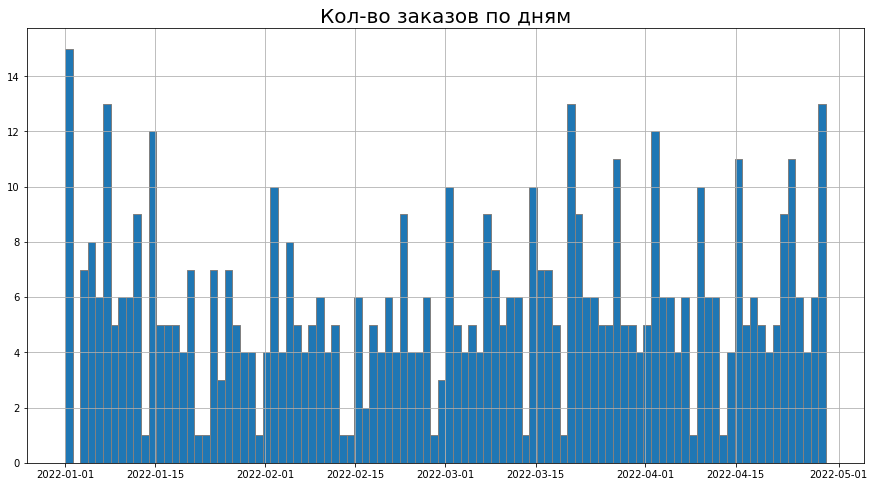

In [13]:
# Кол-во заказов по дням 
print(df['дата'].min())
print(df['дата'].max())
df['дата'].hist(bins=100, figsize=(15,8), ec='grey')
plt.title('Кол-во заказов по дням', fontsize=20)

При попытке посчитать сумму выручки, выявился символ **\xa0**, в некоторых значениях. Он мешает производить вычисления и преобразовать тип данных, избавимся от него. Также уберём значение после запятой, т.к. это усложняет работу со строкой.

### Общая выручка

In [14]:
df['выручка'] = df['выручка'].str.replace(r' ', r'')
df['выручка'] = df['выручка'].str.replace(r'\xa0', r'')
df['выручка'] = df['выручка'].str.split(',').str[0]
df['выручка'] = df['выручка'].astype(int)
print('Общая выручка:', df['выручка'].sum())

Общая выручка: 875286


### Общая прибыль

In [15]:
df['прибыль'] = df['прибыль'].str.replace(r' ', r'')
df['прибыль'] = df['прибыль'].str.replace(r'\xa0', r'')
df['прибыль'] = df['прибыль'].str.split(',').str[0]
df['прибыль'] = df['прибыль'].astype(int)
print('Общая прибыль:',df['прибыль'].sum())

Общая прибыль: 212229


### Рентабельность

In [16]:
df['рентабельность'] = round(abs(df['прибыль']) / (df['выручка'] - df['прибыль']) * 100, 2)
df.head(5)

,order_id,приоритет,количество,выручка,метод доставки,прибыль,покупатель,регион,продукт,упаковка продукта,менеджер,сегмент покупателя,категория продукта,подкатегория продукта,дата,стоимость доставки,рентабельность
0,643,High,21,2781,Express Air,-695,Monica Federle,Nunavut,"SAFCO Commercial Wire Shelving, Black",Large Box,Петров Иван,Corporate,Office Supplies,Storage & Organization,2022-01-02,10,19.99
1,29318,Not Specified,21,2954,Express Air,-522,Bobby Odegard,Ontario,"SAFCO Commercial Wire Shelving, Black",Large Box,Крестьянин Арчибальд,Corporate,Office Supplies,Storage & Organization,2022-03-05,10,15.02
3,31492,Critical,34,971,Express Air,-21,Nicole Hansen,Northwest Territories,Acco PermaВ® 2700 Stacking Storage Drawers,Small Box,Иванов Петр,Small Business,Office Supplies,Storage & Organization,2022-03-09,10,2.12
4,33703,Not Specified,4,63,Express Air,-8,Carl Ludwig,Northwest Territories,Portable Personal File Box,Small Box,Иванов Петр,Corporate,Office Supplies,Storage & Organization,2022-03-14,10,11.27
5,41696,Not Specified,45,237,Express Air,-2088,Bryan Mills,Northwest Territories,Hoover Portapowerв„ў Portable Vacuum,Large Box,Иванов Петр,Small Business,Office Supplies,Appliances,2022-03-27,10,89.81


In [17]:
print('Средняя рентабельность по компании:', round((round(abs(df['прибыль']) /
                                                    (df['выручка'] - df['прибыль']) * 100, 2)).sum() / df['order_id'].count()))

Средняя рентабельность по компании: 29


### Показатели активной клиентской базы

In [18]:
# сделаем таблицу ТОП-30 клиентов по количеству покупок
order_cnt = df.groupby('покупатель').agg({'order_id':'count'}).sort_values(by='order_id',ascending=False).reset_index()
order_cnt = order_cnt.rename(columns = {'order_id':'кол-во заказов'})
order_cnt_30 = order_cnt.head(30)
order_cnt_30.head(10)

,покупатель,кол-во заказов
0,Sally Knutson,13
1,Joy Smith,12
2,Carlos Soltero,11
3,Jack Lebron,11
4,Shahid Shariari,10
5,Sylvia Foulston,9
6,Erica Bern,9
7,Ralph Kennedy,9
8,Justin Hirsh,8
9,Alan Barnes,8


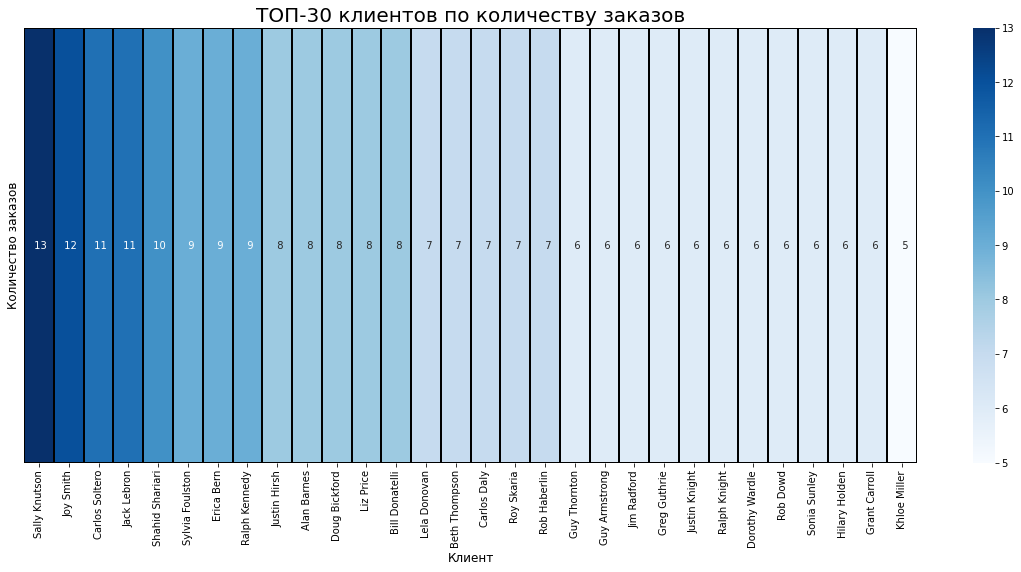

In [19]:
# график ТОП-10 таблиц по кол-ву действий в запросе
order_cnt_heatmap = order_cnt_30.set_index('покупатель')
plt.figure(figsize=(20, 8))
sns.heatmap(order_cnt_heatmap.T, vmin = order_cnt_heatmap.min(), vmax = order_cnt_heatmap.max(), 
            annot = True,  cmap = 'Blues', fmt ='3g', linewidths=0.2, linecolor='black')
plt.ylabel('Количество заказов', fontsize=12)
plt.xlabel('Клиент', fontsize=12)
plt.yticks ([])
plt.title('ТОП-30 клиентов по количеству заказов', fontsize=20)
plt.show()

In [20]:
# сделаем таблицу ТОП-10 по выручке для каждого клиента
buyers_table = (pd.pivot_table(df, index=['покупатель'], values=['выручка','прибыль'],
                               aggfunc='sum').sort_values('выручка', ascending=False)
               )
buyers_table = buyers_table.reset_index()
buyers_table.head(10)

,покупатель,выручка,прибыль
0,Jack Lebron,36563,-750
1,Tony Chapman,35038,-197
2,Sylvia Foulston,32646,6780
3,Erica Bern,25676,991
4,Roy Skaria,24607,-4469
5,Sally Knutson,21199,-173
6,Sanjit Chand,19445,-354
7,Joy Smith,18849,4606
8,Lela Donovan,18201,4859
9,Hilary Holden,17941,1371


In [21]:
# сделаем таблицу ТОП-10 по прибыли для каждого клиента
buyers_table_rev = (pd.pivot_table(df, index=['покупатель'], values=['выручка','прибыль'],
                                   aggfunc='sum').sort_values('прибыль', ascending=False)
                   )
buyers_table_rev = buyers_table_rev.reset_index()
buyers_table_rev.head(10)

,покупатель,выручка,прибыль
0,Beth Paige,2089,45258
1,Bill Donatelli,3693,31787
2,Carlos Soltero,1700,23739
3,Rick Reed,16066,7416
4,Sylvia Foulston,32646,6780
5,Lela Donovan,18201,4859
6,Ralph Kennedy,15680,4850
7,Guy Thornton,15570,4696
8,Harold Engle,12972,4651
9,Joy Smith,18849,4606


Первая тройка имеет показатели по прибыли больше чем их выручка. Сделаем срез по этим покупателям

In [22]:
# рассмотрим подозрительные значения подробнее
display(df.query('покупатель == "Beth Paige"'))
display(df.query('покупатель == "Bill Donatelli"'))
display(df.query('покупатель == "Carlos Soltero"'))

,order_id,приоритет,количество,выручка,метод доставки,прибыль,покупатель,регион,продукт,упаковка продукта,менеджер,сегмент покупателя,категория продукта,подкатегория продукта,дата,стоимость доставки,рентабельность
18,8995,High,5,24,Express Air,44689,Beth Paige,Nunavut,StaplesВ® General Use 3-Ring Binders,Small Box,Петров Иван,Consumer,Office Supplies,Binders and Binder Accessories,2022-01-15,10,-100.05
21,42561,Low,15,1062,Express Air,298,Beth Paige,Northwest Territories,Accessory12,Small Box,Иванов Петр,Consumer,Technology,Telephones and Communication,2022-03-29,10,39.01
295,7906,Medium,37,1003,Regular Air,271,Beth Paige,Nunavut,3M Office Air Cleaner,Medium Box,Петров Иван,Consumer,Office Supplies,Appliances,2022-01-14,5,37.02


,order_id,приоритет,количество,выручка,метод доставки,прибыль,покупатель,регион,продукт,упаковка продукта,менеджер,сегмент покупателя,категория продукта,подкатегория продукта,дата,стоимость доставки,рентабельность
96,15808,Critical,42,906,Express Air,-148,Bill Donatelli,Ontario,"Avery Flip-Chart Easel Binder, Black",Small Box,Крестьянин Арчибальд,Corporate,Office Supplies,Binders and Binder Accessories,2022-02-02,10,14.04
186,21091,High,32,270,Express Air,-54,Bill Donatelli,Ontario,GBC Instant Indexв„ў System for Binding Systems,Small Box,Крестьянин Арчибальд,Corporate,Office Supplies,Binders and Binder Accessories,2022-02-12,10,16.67
187,28420,Low,2,45,Express Air,0,Bill Donatelli,Ontario,Park Ridgeв„ў Embossed Executive Business Enve...,Small Box,Крестьянин Арчибальд,Corporate,Office Supplies,Envelopes,2022-03-02,10,0.00
444,30016,Critical,8,754,Regular Air,-212,Bill Donatelli,Ontario,T18,Small Box,Крестьянин Арчибальд,Corporate,Technology,Telephones and Communication,2022-03-06,5,21.95
592,41543,Low,24,1318,Regular Air,172,Bill Donatelli,Ontario,StarTAC 7760,Small Box,Крестьянин Арчибальд,Corporate,Technology,Telephones and Communication,2022-03-27,5,15.01
681,40961,Medium,7,23,Regular Air,32264,Bill Donatelli,Ontario,Avery 520,Small Box,Крестьянин Арчибальд,Corporate,Office Supplies,Labels,2022-03-25,5,-100.07
686,56101,Not Specified,1,21,Regular Air,-7,Bill Donatelli,Ontario,Holmes Odor Grabber,Medium Box,Крестьянин Арчибальд,Corporate,Office Supplies,Appliances,2022-04-24,5,25.00
860,12452,Medium,1,356,Regular Air,-228,Bill Donatelli,Ontario,Fellowes PB300 Plastic Comb Binding Machine,Small Box,Крестьянин Арчибальд,Corporate,Office Supplies,Binders and Binder Accessories,2022-01-26,5,39.04


,order_id,приоритет,количество,выручка,метод доставки,прибыль,покупатель,регион,продукт,упаковка продукта,менеджер,сегмент покупателя,категория продукта,подкатегория продукта,дата,стоимость доставки,рентабельность
13,1412,Not Specified,13,59,Express Air,26,Carlos Soltero,Nunavut,Avery 52,Small Box,Петров Иван,Consumer,Office Supplies,Labels,2022-01-04,10,78.79
15,36293,Medium,25,165,Express Air,-94,Carlos Soltero,Atlantic,Xerox 220,Small Box,Семейкин Владислав,Consumer,Office Supplies,Paper,2022-03-17,10,36.29
245,515,Not Specified,19,394,Regular Air,30,Carlos Soltero,Nunavut,Holmes HEPA Air Purifier,Medium Box,Петров Иван,Consumer,Office Supplies,Appliances,2022-01-01,5,8.24
251,1792,Low,28,370,Regular Air,-5,Carlos Soltero,Nunavut,Tenex Personal Project File with Scoop Front D...,Small Box,Петров Иван,Consumer,Office Supplies,Storage & Organization,2022-01-05,5,1.33
253,16932,Critical,25,144,Regular Air,-120,Carlos Soltero,Northwest Territories,Xerox 1924,Small Box,Иванов Петр,Consumer,Office Supplies,Paper,2022-02-05,5,45.45
255,22532,Critical,13,121,Regular Air,-11,Carlos Soltero,Northwest Territories,GBC Standard Plastic Binding Systems Combs,Small Box,Иванов Петр,Consumer,Office Supplies,Binders and Binder Accessories,2022-02-18,5,8.33
268,30499,High,16,92,Regular Air,24228,Carlos Soltero,Atlantic,Wausau Papers AstrobrightsВ® Colored Envelopes,Small Box,Семейкин Владислав,Consumer,Office Supplies,Envelopes,2022-03-08,5,-100.38
271,34978,High,49,165,Regular Air,-269,Carlos Soltero,Atlantic,Self-Adhesive Ring Binder Labels,Small Box,Семейкин Владислав,Consumer,Office Supplies,Binders and Binder Accessories,2022-03-16,5,61.98
279,35558,Critical,2,34,Regular Air,-22,Carlos Soltero,Atlantic,9-3/4 Diameter Round Wall Clock,Small Box,Семейкин Владислав,Consumer,Furniture,Office Furnishings,2022-03-16,5,39.29
285,46119,Critical,23,93,Regular Air,15,Carlos Soltero,Atlantic,Durable Pressboard Binders,Small Box,Семейкин Владислав,Consumer,Office Supplies,Binders and Binder Accessories,2022-04-03,5,19.23


Каждый имеет по одному некорректно внесённому заказу, удалим их

In [23]:
df = df.drop(index=[18])
df = df.drop(index=[268])
df = df.drop(index=[681])

In [24]:
# сделаем новую таблицу ТОП-10 по прибыли для каждого клиента
buyers_table_rev = (pd.pivot_table(df, index=['покупатель'], values=['выручка','прибыль'],
                                   aggfunc='sum').sort_values('прибыль', ascending=False)
                   )
buyers_table_rev = buyers_table_rev.reset_index()
buyers_table_rev.head(10)

,покупатель,выручка,прибыль
0,Rick Reed,16066,7416
1,Sylvia Foulston,32646,6780
2,Lela Donovan,18201,4859
3,Ralph Kennedy,15680,4850
4,Guy Thornton,15570,4696
5,Harold Engle,12972,4651
6,Joy Smith,18849,4606
7,Ricardo Emerson,16262,4559
8,Rob Dowd,13257,4109
9,Brendan Dodson,16542,3827


### Визуализируем активную клиентскую базу

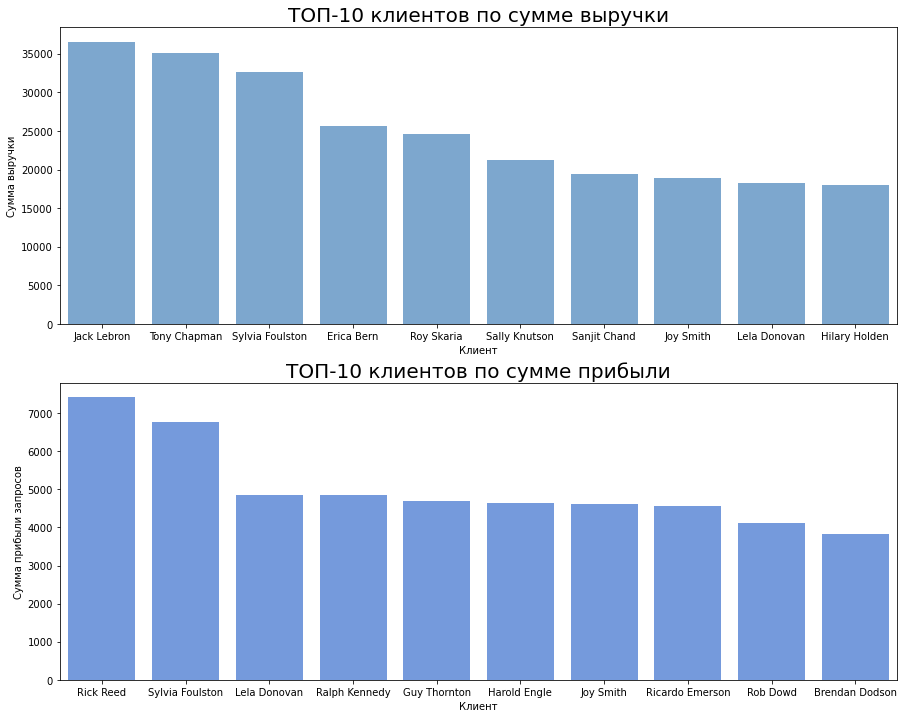

In [25]:
# TОП-10 кол-ва запросов для etl/dev
plt.figure(figsize=(15, 12)) 

ax1 = plt.subplot(2, 1, 1)
ax1 = sns.barplot(data = buyers_table.head(10), x = 'покупатель', y = 'выручка', color = '#6fa8dc')
ax1.set_title('ТОП-10 клиентов по сумме выручки', fontsize=20)
ax1.set_xlabel('Клиент')
ax1.set_ylabel('Сумма выручки')

ax2 = plt.subplot(2, 1, 2)
ax2 = sns.barplot(data = buyers_table_rev.head(10), x = 'покупатель', y = 'прибыль', color = 'cornflowerblue')
ax2.set_title('ТОП-10 клиентов по сумме прибыли', fontsize=20)
ax2.set_xlabel('Клиент')
ax2.set_ylabel('Сумма прибыли запросов')
plt.show()

### Средний чек

In [26]:
print('Средний чек:', round(df['выручка'].sum() / df['order_id'].count(), 2))

Средний чек: 1540.75


In [27]:
# средний чек первых 30 клиентов по количеству заказов
average_check_30 = order_cnt_30.merge(buyers_table, on='покупатель')
average_check_30['средний чек'] = round(average_check_30['выручка'] / average_check_30['кол-во заказов'], 2)
average_check_30 = (average_check_30[['покупатель','кол-во заказов','выручка','средний чек']].
                    sort_values('средний чек', ascending=False))
average_check_30.head(19)

,покупатель,кол-во заказов,выручка,средний чек
5,Sylvia Foulston,9,32646,3627.33
16,Roy Skaria,7,24607,3515.29
3,Jack Lebron,11,36563,3323.91
27,Hilary Holden,6,17941,2990.17
6,Erica Bern,9,25676,2852.89
13,Lela Donovan,7,18201,2600.14
18,Guy Thornton,6,15570,2595.00
15,Carlos Daly,7,16233,2319.00
25,Rob Dowd,6,13257,2209.50
28,Grant Carroll,6,12532,2088.67


Лишь 18 клиентов имеют средний чек больше общего среднего чека

<AxesSubplot:xlabel='средний чек'>

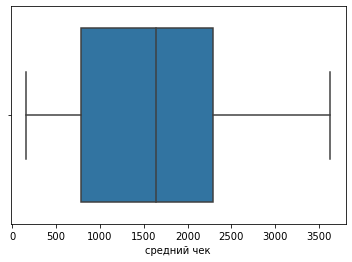

In [28]:
sns.boxplot(x=average_check_30['средний чек'])

In [29]:
average_check_30.describe()

,кол-во заказов,выручка,средний чек
count,30.000000,30.000000,30.000000
mean,7.666667,12582.433333,1630.342000
std,2.039833,9057.158105,1021.845082
min,5.000000,949.000000,154.550000
25%,6.000000,5514.750000,785.062500
50%,7.000000,11335.500000,1637.510000
75%,8.750000,17514.000000,2291.625000
max,13.000000,36563.000000,3627.330000


### Затраты на логистику

In [30]:
# затраты на логистику по компаниям
tab = (df.groupby('метод доставки').agg({'стоимость доставки':'sum'}).
 rename(columns={'стоимость доставки':'стоимость отправлений'})
)

tab

,стоимость отправлений
метод доставки,
Express Air,1390
Regular Air,2145


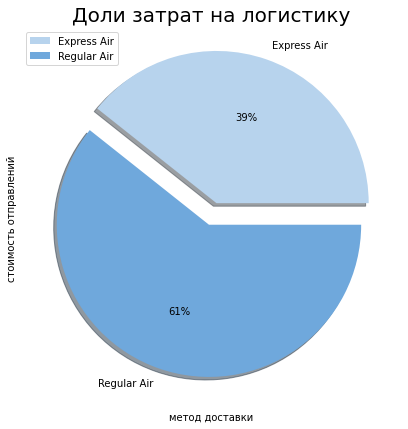

In [31]:
(tab.plot(kind='pie', y='стоимость отправлений', x='метод доставки', figsize=(12,7), autopct='%1.0f%%',
          colors=['#b7d3ed', '#6fa8dc'], shadow=True, explode = (0.1, 0.05)))
plt.title('Доли затрат на логистику', fontsize=20)
plt.xlabel('метод доставки', fontsize=10)
plt.legend(loc= 2)

In [32]:
tab_1 = (df.groupby('метод доставки').agg({'стоимость доставки':'count'}).
 rename(columns={'стоимость доставки':'кол-во отправлений'})
)

tab_1

,кол-во отправлений
метод доставки,
Express Air,139
Regular Air,429


Text(0.5, 0, 'метод доставки')

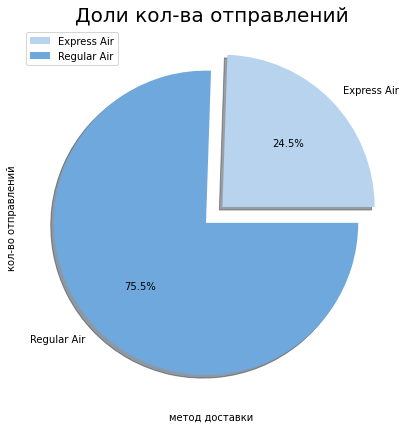

In [33]:
(tab_1.plot(kind='pie', y='кол-во отправлений', x='метод доставки', figsize=(12,7), autopct='%1.1f%%',
            colors=['#b7d3ed', '#6fa8dc'], shadow=True, explode = (0.1, 0.05))
)
plt.title('Доли кол-ва отправлений', fontsize=20)
plt.xlabel('метод доставки', fontsize=10)

## Вывести таблицу с менеджерами, которые продают с отрицательной прибылью и показать количество таких заказов

In [34]:
# все отрицательные прибыли по менеджерам
sales_min = (df.query('прибыль <= 0').groupby(['менеджер','прибыль']).agg({'прибыль':'count'}).
             rename(columns={'прибыль':'кол-во'})
            )

sales_min

кол-во
менеджер           прибыль        
Иванов Петр        -2088         1
                   -942          1
                   -743          1
                   -539          1
                   -517          1
...                            ...
Семейкин Владислав -12           1
                   -11           2
                   -6            1
                   -5            2
                   -3            1

[265 rows x 1 columns]

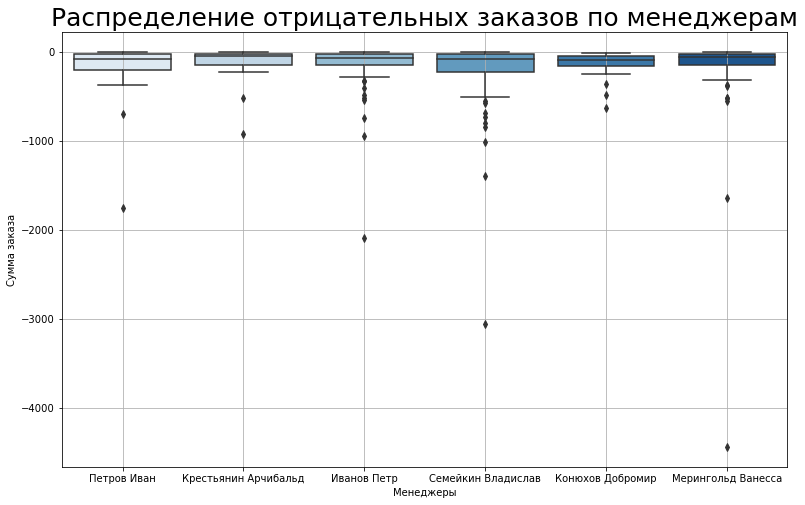

In [35]:
# построим boxplot для отрицательных заказов по менеджерам
sales_min_graph = df.query('прибыль <= 0')
plt.figure(figsize=(13, 8))
(sns.boxplot(data = sales_min_graph, x='менеджер', y = 'прибыль', palette="Blues")
    .set(xlabel = 'Менеджеры', ylabel = 'Сумма заказа')
)
plt.title('Распределение отрицательных заказов по менеджерам', fontsize=25)
plt.grid()
plt.show()

У Иванова и Семейкина выбросов больше, чем у остальных. У Меринголь сумма отрицательной прибыли по заказу превышает 4000. 

In [36]:
# количество и сумма заказов с отрицательной прибылью по менеджерам
negative_sales = (df.query('прибыль <= 0').groupby('менеджер').agg({'прибыль':'sum','order_id':'count'}).
                  reset_index().rename(columns={'order_id':'кол-во убыточных заказов'}).sort_values('прибыль', ascending=True).
                  set_index('менеджер')
                 )

negative_sales

,прибыль,кол-во убыточных заказов
менеджер,,
Семейкин Владислав,-15045,62
Мерингольд Ванесса,-14950,85
Иванов Петр,-10821,67
Конюхов Добромир,-4403,33
Петров Иван,-3812,15
Крестьянин Арчибальд,-3436,29


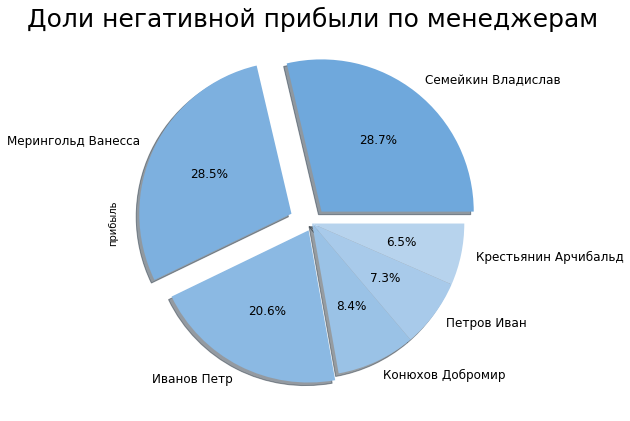

In [37]:
# график долей отрицательной прибыли по менеджерам
negative_sales['прибыль'] = abs(negative_sales['прибыль'])
(negative_sales.plot(kind='pie', y='прибыль', explode = (0.1, 0.15, 0.05, 0, 0, 0),
                     figsize=(12, 7), shadow=True, autopct= '%1.1f%%', fontsize=12, 
                     colors=['#6fa8dc','#7db0df','#8bb9e3','#9ac2e6','#a8caea','#b7d3ed'])
)
plt.title('Доли негативной прибыли по менеджерам', fontsize=25)
plt.legend([],[], frameon=False)
plt.show()

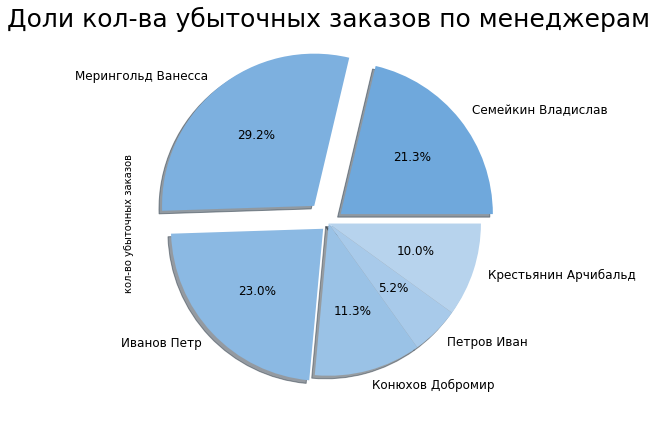

In [38]:
# график долей кол-ва убыточных заказов по менеджерам
(negative_sales.plot(kind='pie', y='кол-во убыточных заказов', explode = (0.1, 0.15, 0.05, 0, 0, 0),
                     figsize=(12, 7), shadow=True, autopct= '%1.1f%%', fontsize=12, 
                     colors=['#6fa8dc','#7db0df','#8bb9e3','#9ac2e6','#a8caea','#b7d3ed'])
)
plt.title('Доли кол-ва убыточных заказов по менеджерам', fontsize=25)
plt.legend([],[], frameon=False)
plt.show()

## Положительные показатели менеджеров и их рейтинг

In [39]:
manadger_rat = (df.groupby(['менеджер','регион']).agg({'прибыль':'sum', 'order_id':'count'}).
                reset_index().sort_values('прибыль', ascending=False).rename(columns={'order_id':'кол-во продаж'}))

manadger_rat['Средняя прибыль'] = round(manadger_rat['прибыль'] / manadger_rat['кол-во продаж'], 2)
manadger_rat

,менеджер,регион,прибыль,кол-во продаж,Средняя прибыль
0,Иванов Петр,Northwest Territories,37193,127,292.86
3,Мерингольд Ванесса,West,35380,178,198.76
5,Семейкин Владислав,Atlantic,25819,128,201.71
2,Крестьянин Арчибальд,Ontario,6970,49,142.24
1,Конюхов Добромир,Prarie,5323,60,88.72
4,Петров Иван,Nunavut,363,26,13.96


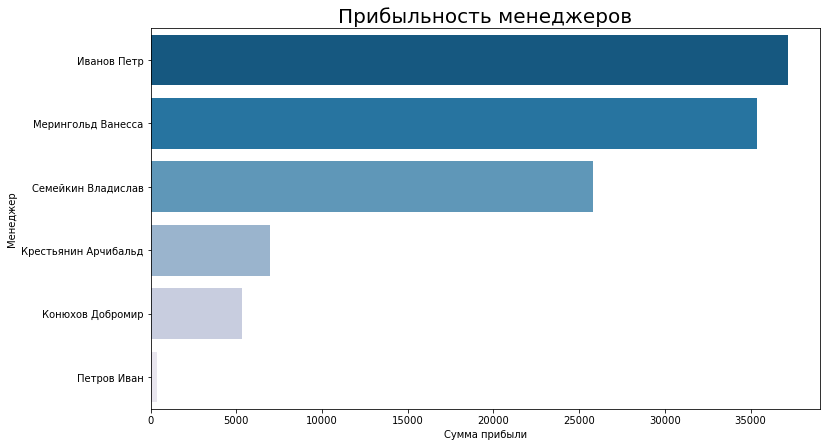

In [40]:
plt.figure(figsize=(12, 7))
ax = sns.barplot(y='менеджер',x='прибыль',data=manadger_rat, palette="PuBu_r")
ax.set_xlabel('Сумма прибыли',fontsize=10)
ax.set_ylabel('Менеджер',fontsize=10)
ax.set_title('Прибыльность менеджеров', fontsize=20)
plt.show()

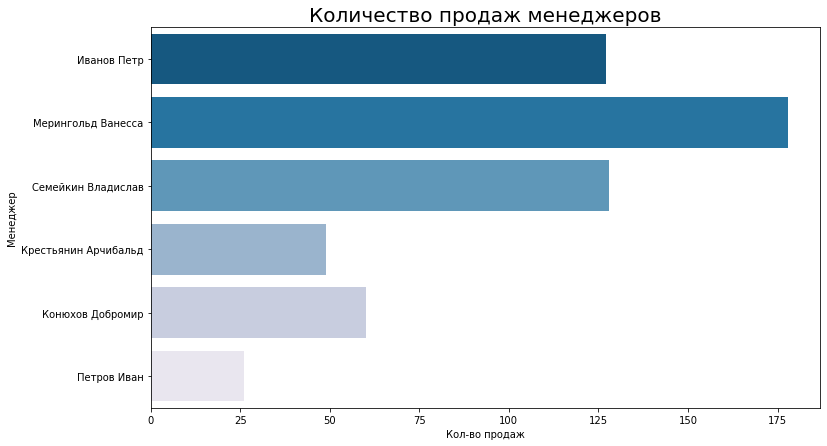

In [41]:
plt.figure(figsize=(12, 7))
ax = sns.barplot(y='менеджер',x='кол-во продаж',data=manadger_rat, palette="PuBu_r")
ax.set_xlabel('Кол-во продаж',fontsize=10)
ax.set_ylabel('Менеджер',fontsize=10)
ax.set_title('Количество продаж менеджеров', fontsize=20)
plt.show()

## Выводы:

Исходными данными являлись 6 файлов csv, которые объединили в один. Удалили дубликаты, избавились от неявных пробелов \xa0 и установили нужные типы данных. Информация представлена с 01.01.2022 по 29.04.2022
По графику "Количество заказов по дням" видно резкие спады продаж каждые 8-10 дней и резкие пиковые значения продаж каждые 5-6 дней.

**Произведён и добавлен в датафрейм рассчёт основных показателей:**

- общая выручка;
- общая прибыль;
- рентабельность.

**Рассчёт показателей активной клиентской базы показал:**

- ТОП-10 количества заказов от 8 до 13;
- ТОП-10 по выручке от 17941 до 36653;
- ТОП-10 по прибыли от 3827 до 7416.

Средний чек - 1540, лишь 18 клиентов имеют средний чек больше общего среднего чека.

**Затраты на логистику:**
- Express Air	1390;
- Regular Air	2145.

**Количество отправлений:**
- Express Air	139;
- Regular Air	429.

Представлена таблица с менеджерами, которые продают с отрицательной прибылью и показано количество таких заказов.

Представлены положительные показатели менеджеров и их рейтинг.
